In [1]:
#Import module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from collections import defaultdict
pd.options.display.float_format = '{:.2f}'.format

import os
file_path = 'C:/Users/Yoga Pratama S/Desktop/Research Assistant RMIT/NYC_Four_Data'
os.chdir(file_path)

In [2]:
moves = 'fs_moves_200212.csv'
venues = 'fs_venues_200212.csv'

df_moves = pd.read_csv(moves)
df_venues = pd.read_csv(venues)

In [3]:
df_moves

,from_id,to_id,month,time_of_day,no_checkins
0,4840fe6bf964a52030501fe3,3fd66200f964a52093e81ee3,2018-01,NIGHT,16
1,4840fe6bf964a52030501fe3,3fd66200f964a52093e81ee3,2018-10,AFTERNOON,17
2,4840fe6bf964a52030501fe3,3fd66200f964a52093e81ee3,2018-05,AFTERNOON,17
3,41390580f964a520dc1a1fe3,3fd66200f964a520c2e51ee3,2018-05,MIDDAY,14
4,3fd66200f964a52042e31ee3,3fd66200f964a52042e31ee3,2018-02,NIGHT,17
...,...,...,...,...,...
28555,4ace64bef964a52053d020e3,58c28430fbe8ff085cb0ec61,2018-07,AFTERNOON,11
28556,4e093b301838eb15af0d3391,58c28430fbe8ff085cb0ec61,2018-12,MIDDAY,11
28557,42911d00f964a520f5231fe3,58d40a678ae36338aa7fdebe,2018-11,MIDDAY,43
28558,42911d00f964a520f5231fe3,58d40a678ae36338aa7fdebe,2018-04,MIDDAY,24


In [4]:
df_venues

,id,name,lat,lon,cat,ntacode,region,major_cat
0,503a43f2e4b022a04b87d65b,Red Stairs Times Square,40.76,-73.98,Plazas,MN17,Manhattan,Outdoors & Recreation
1,4c4dc3d3ea24c9b6fa459d14,Gate 26,40.65,-73.78,Airport Gates,QN98,Queens,Travel & Transport
2,4bf4834cff90c9b6b7605528,Gap,40.76,-73.98,Clothing Stores,MN17,Manhattan,Shop & Service
3,4d94659958caa143e65aa925,Dunkin',40.84,-73.91,Donut Shops,BX63,Bronx,Food
4,46ac520df964a52071491fe3,Randall's Island,40.80,-73.93,Islands,MN99,Manhattan,Outdoors & Recreation
...,...,...,...,...,...,...,...,...
5596,5841b0da8d8e996767d13e4c,Red Poke,40.76,-73.99,Poke Places,MN15,Manhattan,Food
5597,4b6db8e8f964a520aa892ce3,Cafe Bravo,40.75,-74.00,Delis / Bodegas,MN13,Manhattan,Food
5598,51648fa9e4b0094709336aba,Fairfield Inn & Suites by Marriott New York Mi...,40.75,-74.00,Hotels,MN13,Manhattan,Travel & Transport
5599,4a981282f964a520612a20e3,New York Sports Clubs,40.82,-73.94,Gyms,MN03,Manhattan,Outdoors & Recreation


In [5]:
df_moves.describe()

,no_checkins
count,28560.00
mean,26.40
std,96.43
min,10.00
25%,11.00
50%,15.00
75%,23.00
max,7279.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

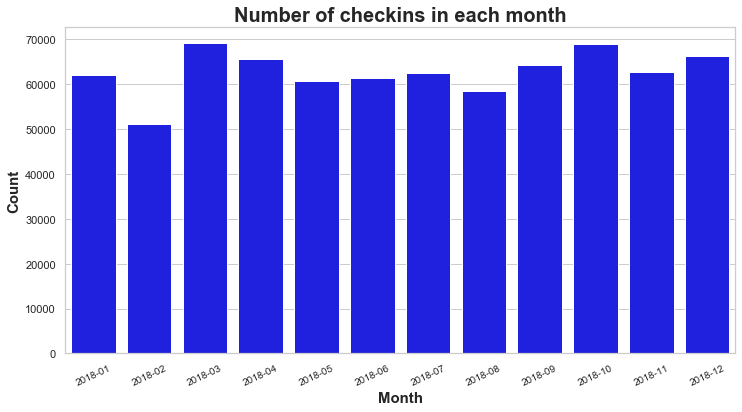

In [6]:
#Look at the difference between each month check in
by_month = df_moves.groupby('month', as_index = False).sum()
plt.figure (figsize=(12,6))
sns.set(style = 'whitegrid')
sns.barplot(data=by_month, x='month', y='no_checkins', color ='blue')
plt.title("Number of checkins in each month", fontsize=20, weight='bold')
plt.xlabel("Month", fontsize=15, weight='bold')
plt.ylabel("Count", fontsize=15, weight='bold')
plt.xticks(rotation=25, fontsize=10)


In [7]:
#subset the data on June
df_june = df_moves.loc[df_moves['month'] == "2018-06"]
df_june.reset_index(inplace=True)
df_june = df_june.drop(columns = ['index'])
df_june

,from_id,to_id,month,time_of_day,no_checkins
0,3fd66200f964a520d7f11ee3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,11
1,49b7ed6df964a52030531fe3,3fd66200f964a5209ee81ee3,2018-06,NIGHT,43
2,4b0737c3f964a520e4f922e3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,18
3,4a3d4aecf964a52012a21fe3,4161e400f964a520721d1fe3,2018-06,MIDDAY,26
4,4b50deaaf964a520293627e3,427c0500f964a52097211fe3,2018-06,MIDDAY,12
...,...,...,...,...,...
2326,515abd65e4b08eda86b30e6e,541a2341498e51ce1037963a,2018-06,AFTERNOON,15
2327,4c1164576e5dc9b69506b02d,541a2341498e51ce1037963a,2018-06,AFTERNOON,13
2328,49ff62f9f964a52013701fe3,541a2341498e51ce1037963a,2018-06,AFTERNOON,10
2329,40abf500f964a52035f31ee3,5755fc1a498e88763b2df8eb,2018-06,AFTERNOON,12


In [8]:
#merge df_june with venue locations on "to_id"
df_june = df_june.rename(columns = {"to_id" : "id"})
df_june

,from_id,id,month,time_of_day,no_checkins
0,3fd66200f964a520d7f11ee3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,11
1,49b7ed6df964a52030531fe3,3fd66200f964a5209ee81ee3,2018-06,NIGHT,43
2,4b0737c3f964a520e4f922e3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,18
3,4a3d4aecf964a52012a21fe3,4161e400f964a520721d1fe3,2018-06,MIDDAY,26
4,4b50deaaf964a520293627e3,427c0500f964a52097211fe3,2018-06,MIDDAY,12
...,...,...,...,...,...
2326,515abd65e4b08eda86b30e6e,541a2341498e51ce1037963a,2018-06,AFTERNOON,15
2327,4c1164576e5dc9b69506b02d,541a2341498e51ce1037963a,2018-06,AFTERNOON,13
2328,49ff62f9f964a52013701fe3,541a2341498e51ce1037963a,2018-06,AFTERNOON,10
2329,40abf500f964a52035f31ee3,5755fc1a498e88763b2df8eb,2018-06,AFTERNOON,12


In [9]:
df = pd.merge(df_june, df_venues, on='id', how='left')
df

,from_id,id,month,time_of_day,no_checkins,name,lat,lon,cat,ntacode,region,major_cat
0,3fd66200f964a520d7f11ee3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,11,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food
1,49b7ed6df964a52030531fe3,3fd66200f964a5209ee81ee3,2018-06,NIGHT,43,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food
2,4b0737c3f964a520e4f922e3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,18,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food
3,4a3d4aecf964a52012a21fe3,4161e400f964a520721d1fe3,2018-06,MIDDAY,26,Radio City Music Hall,40.76,-73.98,Concert Halls,MN17,Manhattan,Arts & Entertainment
4,4b50deaaf964a520293627e3,427c0500f964a52097211fe3,2018-06,MIDDAY,12,The Metropolitan Museum of Art,40.78,-73.96,Art Museums,MN99,Manhattan,Arts & Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
2326,515abd65e4b08eda86b30e6e,541a2341498e51ce1037963a,2018-06,AFTERNOON,15,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation
2327,4c1164576e5dc9b69506b02d,541a2341498e51ce1037963a,2018-06,AFTERNOON,13,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation
2328,49ff62f9f964a52013701fe3,541a2341498e51ce1037963a,2018-06,AFTERNOON,10,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation
2329,40abf500f964a52035f31ee3,5755fc1a498e88763b2df8eb,2018-06,AFTERNOON,12,The Evolution Store,40.73,-73.99,Hobby Shops,MN23,Manhattan,Shop & Service


In [10]:
#NYC HeatMap for different emergency type
from folium import plugins
from folium.plugins import HeatMap

def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=11):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

def generateHeatMap(df, time_of_day):   
    base_map = generateBaseMap()
    df = df.loc[df.time_of_day == time_of_day]
#     df = df.loc[df.region == region]
#     df = df.loc[df.major_cat == major_cat]
    HeatMap (data=df[['lat', 'lon', 'no_checkins']], radius=7, max_zoom=13).add_to(base_map)
    return base_map

In [11]:
generateHeatMap(df, time_of_day = "NIGHT")

In [12]:
#identify movement between 2 points

#merge df_june with venue locations on "to_id"
df1 = df.rename(columns = {"id" : "to_id"})
df1 = df1.rename(columns = {"from_id" : "id"})
df1

,id,to_id,month,time_of_day,no_checkins,name,lat,lon,cat,ntacode,region,major_cat
0,3fd66200f964a520d7f11ee3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,11,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food
1,49b7ed6df964a52030531fe3,3fd66200f964a5209ee81ee3,2018-06,NIGHT,43,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food
2,4b0737c3f964a520e4f922e3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,18,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food
3,4a3d4aecf964a52012a21fe3,4161e400f964a520721d1fe3,2018-06,MIDDAY,26,Radio City Music Hall,40.76,-73.98,Concert Halls,MN17,Manhattan,Arts & Entertainment
4,4b50deaaf964a520293627e3,427c0500f964a52097211fe3,2018-06,MIDDAY,12,The Metropolitan Museum of Art,40.78,-73.96,Art Museums,MN99,Manhattan,Arts & Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
2326,515abd65e4b08eda86b30e6e,541a2341498e51ce1037963a,2018-06,AFTERNOON,15,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation
2327,4c1164576e5dc9b69506b02d,541a2341498e51ce1037963a,2018-06,AFTERNOON,13,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation
2328,49ff62f9f964a52013701fe3,541a2341498e51ce1037963a,2018-06,AFTERNOON,10,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation
2329,40abf500f964a52035f31ee3,5755fc1a498e88763b2df8eb,2018-06,AFTERNOON,12,The Evolution Store,40.73,-73.99,Hobby Shops,MN23,Manhattan,Shop & Service


In [13]:
#trim venue dataframe
loc = ['id', 'name', 'lat', 'lon']
df_venues_trim = df_venues[loc]
df_venues_trim

,id,name,lat,lon
0,503a43f2e4b022a04b87d65b,Red Stairs Times Square,40.76,-73.98
1,4c4dc3d3ea24c9b6fa459d14,Gate 26,40.65,-73.78
2,4bf4834cff90c9b6b7605528,Gap,40.76,-73.98
3,4d94659958caa143e65aa925,Dunkin',40.84,-73.91
4,46ac520df964a52071491fe3,Randall's Island,40.80,-73.93
...,...,...,...,...
5596,5841b0da8d8e996767d13e4c,Red Poke,40.76,-73.99
5597,4b6db8e8f964a520aa892ce3,Cafe Bravo,40.75,-74.00
5598,51648fa9e4b0094709336aba,Fairfield Inn & Suites by Marriott New York Mi...,40.75,-74.00
5599,4a981282f964a520612a20e3,New York Sports Clubs,40.82,-73.94


In [14]:
df2 = pd.merge(df1, df_venues_trim, on='id', how='left')
df2

,id,to_id,month,time_of_day,no_checkins,name_x,lat_x,lon_x,cat,ntacode,region,major_cat,name_y,lat_y,lon_y
0,3fd66200f964a520d7f11ee3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,11,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food,Bryant Park,40.75,-73.98
1,49b7ed6df964a52030531fe3,3fd66200f964a5209ee81ee3,2018-06,NIGHT,43,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food,Times Square,40.76,-73.98
2,4b0737c3f964a520e4f922e3,3fd66200f964a5209ee81ee3,2018-06,MIDDAY,18,Carmine’s Italian Restaurant,40.76,-73.99,Italian Restaurants,MN17,Manhattan,Food,MTA Subway - 42nd St/Times Square/Port Authori...,40.76,-73.99
3,4a3d4aecf964a52012a21fe3,4161e400f964a520721d1fe3,2018-06,MIDDAY,26,Radio City Music Hall,40.76,-73.98,Concert Halls,MN17,Manhattan,Arts & Entertainment,St. Patrick's Cathedral,40.76,-73.98
4,4b50deaaf964a520293627e3,427c0500f964a52097211fe3,2018-06,MIDDAY,12,The Metropolitan Museum of Art,40.78,-73.96,Art Museums,MN99,Manhattan,Arts & Entertainment,Bow Bridge,40.78,-73.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,515abd65e4b08eda86b30e6e,541a2341498e51ce1037963a,2018-06,AFTERNOON,15,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation,One World Observatory,40.71,-74.01
2327,4c1164576e5dc9b69506b02d,541a2341498e51ce1037963a,2018-06,AFTERNOON,13,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation,Battery Park City Esplanade,40.71,-74.02
2328,49ff62f9f964a52013701fe3,541a2341498e51ce1037963a,2018-06,AFTERNOON,10,Equinox Brookfield Place,40.71,-74.01,Gyms,MN25,Manhattan,Outdoors & Recreation,Century 21 Department Store,40.71,-74.01
2329,40abf500f964a52035f31ee3,5755fc1a498e88763b2df8eb,2018-06,AFTERNOON,12,The Evolution Store,40.73,-73.99,Hobby Shops,MN23,Manhattan,Shop & Service,Washington Square Park,40.73,-74.00


In [24]:
df2.isna().sum()
df2 = df2.dropna()

In [36]:
#Thanks to @BobHaffner https://medium.com/@bobhaffner/folium-lines-with-arrows-25a0fe88e4e
from collections import namedtuple
def get_arrows(locations, color='red', size=6, n_arrows=3):
    
    '''
    Get a list of correctly placed and rotated 
    arrows/markers to be plotted
    
    Parameters
    locations : list of lists of lat lons that represent the 
                start and end of the line. 
                eg [[41.1132, -96.1993],[41.3810, -95.8021]]
    arrow_color : default is 'blue'
    size : default is 6
    n_arrows : number of arrows to create.  default is 3
    Return
    list of arrows/markers
    '''
    
    Point = namedtuple('Point', field_names=['lat', 'lon'])
    
    # creating point from our Point named tuple
    p1 = Point(locations[0][0], locations[0][1])
    p2 = Point(locations[1][0], locations[1][1])
    
    # getting the rotation needed for our marker.  
    # Subtracting 90 to account for the marker's orientation
    # of due East(get_bearing returns North)
    rotation = get_bearing(p1, p2) - 90
    
    # get an evenly space list of lats and lons for our arrows
    # note that I'm discarding the first and last for aesthetics
    # as I'm using markers to denote the start and end
    arrow_lats = np.linspace(p1.lat, p2.lat, n_arrows + 2)[1:n_arrows+1]
    arrow_lons = np.linspace(p1.lon, p2.lon, n_arrows + 2)[1:n_arrows+1]
    
    arrows = []
    
    #creating each "arrow" and appending them to our arrows list
    for points in zip(arrow_lats, arrow_lons):
        arrows.append(folium.RegularPolygonMarker(location=points, 
                      fill_color=color, number_of_sides=3, 
                      radius=size, rotation=rotation))
    return arrows

In [47]:
def generateMovement(df, time_of_day, region, cat):  
    base_map2 = generateBaseMap()
    df = df.loc[df.time_of_day == time_of_day]
    df = df.loc[df.region == region]
    df = df.loc[df.cat == cat]

    for row in df.iterrows():
        row_values = row[1]
        location1 = [row_values['lat_x'], row_values['lon_x']]
        location2 = [row_values['lat_y'], row_values['lon_y']]
        location = [location1, location2]
        SAF = folium.PolyLine(locations=location, weight=5, color='red')
        arrows = get_arrows(locations=location, n_arrows=1)
        for arrow in arrows:
            arrow.add_to(base_map2)
        base_map2.add_child(SAF)
    
    return base_map2

In [56]:
generateMovement(df2, time_of_day = "NIGHT", region = "Manhattan", cat = "Train Stations")

In [45]:
df2.major_cat.unique()

array(['Food', 'Arts & Entertainment', 'Shop & Service',
       'Professional & Other Places', 'Outdoors & Recreation',
       'Travel & Transport', 'Nightlife Spot', 'Residence',
       'College & University', 'Event'], dtype=object)

In [46]:
df2.cat.unique()

array(['Italian Restaurants', 'Concert Halls', 'Art Museums',
       'Bowling Alleys', 'Bookstores', 'Department Stores', 'Libraries',
       'Art Galleries', 'Bakeries', 'Buildings', 'Grocery Stores',
       'Baseball Stadiums', 'Furniture / Home Stores',
       'Gyms or Fitness Centers', 'Plazas', 'Electronics Stores', 'Parks',
       'Coffee Shops', 'Gyms', 'Metro Stations', 'Hotels', 'Pharmacies',
       'Warehouse Stores', 'Airport Terminals', 'Offices',
       'Asian Restaurants', 'Supermarkets', 'Golf Courses',
       'Scenic Lookouts', 'Gas Stations', 'Convention Centers',
       'Clothing Stores', 'Rental Car Locations', 'Trails', 'Donut Shops',
       'Toy / Game Stores', 'Other Great Outdoors', 'Diners',
       'French Restaurants', 'Gift Shops', 'Exhibits', 'Burger Joints',
       'American Restaurants', 'Airport Lounges', 'Pizza Places',
       'Sandwich Places', 'Airport Gates', 'Parking', 'Theaters',
       'Food Courts', 'Moving Targets', 'Mediterranean Restaurants',
  

In [52]:
df2.region.unique()

array(['Manhattan', 'Queens', 'Bronx'], dtype=object)